In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Read in current version of the df. 
current_df = pd.read_csv('current_features.csv')

y = current_df['target_status']

feature_cols = ['pp_contacts', 'pl_contacts', 'dip_pp_contacts', 'dip_lp_contacts',
       'hyd_lp_contacts', 'Ppep_Nlip_contacts', 'Npep_Plip_contacts']
X = current_df[feature_cols]

In [17]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

## Training

In [37]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=0)
clf.fit(X_train, y_train)
print(clf.n_iter_)

139


In [43]:
# Print # accuracy and save loss array
accuracy_training = clf.score(X_train, y_train)
print(f"Training Accuracy: {accuracy_training:.2f}")

# Save training loss curve
training_loss_curved = clf.loss_curve_

Training Accuracy: 0.80


## Test set

In [44]:
# Fit test data
clf.fit(X_test, y_test)
print(clf.n_iter_)

# Print # accuracy and save loss array
accuracy_testing = clf.score(X_test, y_test)
print(f"Testing Accuracy: {accuracy_testing:.2f}")
test_loss_curved = clf.loss_curve_


100
Testing Accuracy: 0.80


Text(0, 0.5, 'Loss (Cross Entropy)')

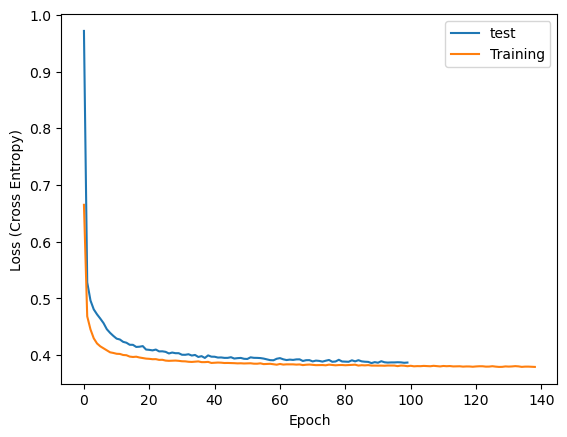

In [45]:
plt.clf()
plt.plot(np.arange(len(test_loss_curved)),test_loss_curved,label='test')
plt.plot(np.arange(len(training_loss_curved)),training_loss_curved,label='Training')
plt.legend()
plt.xlabel('Epoch') # # of iterations basically
plt.ylabel('Loss (Cross Entropy)')


## Make a prediction 

In [47]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     23394
           1       0.83      0.62      0.71      7236
           2       0.80      0.37      0.51      7256
           3       0.56      0.89      0.69      6437

    accuracy                           0.80     44323
   macro avg       0.77      0.71      0.71     44323
weighted avg       0.82      0.80      0.79     44323



## Check value distribution in df:

how many 0s, 1s etc ...

In [69]:
y.value_counts()/len(y)

target_status
0    0.527559
2    0.163286
1    0.161949
3    0.147205
Name: count, dtype: float64

# Use SMOTE to generate a synthetic sample

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [6]:
from sklearn.datasets import load_iris 
iris_dataset = load_iris()
type(iris_dataset)

sklearn.utils._bunch.Bunch

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [12]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  